In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale 
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [39]:
df = pd.read_csv("cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [40]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [52]:
df.Level.value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [54]:
df.Gender.value_counts()

1    598
2    402
Name: Gender, dtype: int64

(24.5, -0.5)

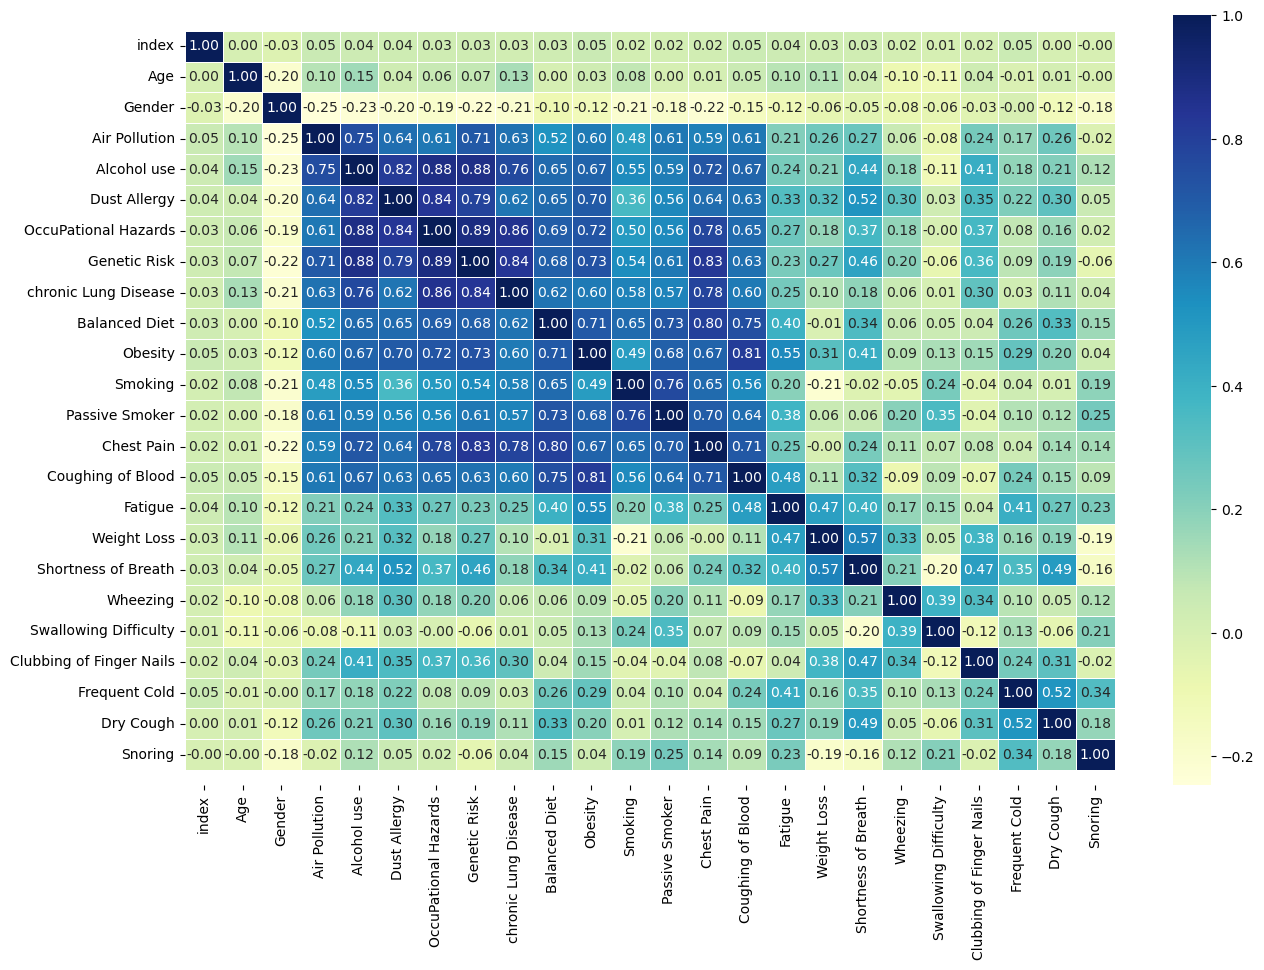

In [48]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

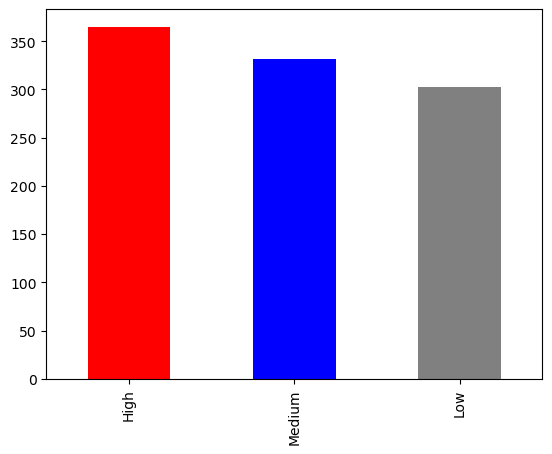

In [51]:
df["Level"].value_counts().plot(kind="bar",color=["red", "blue","gray"]);

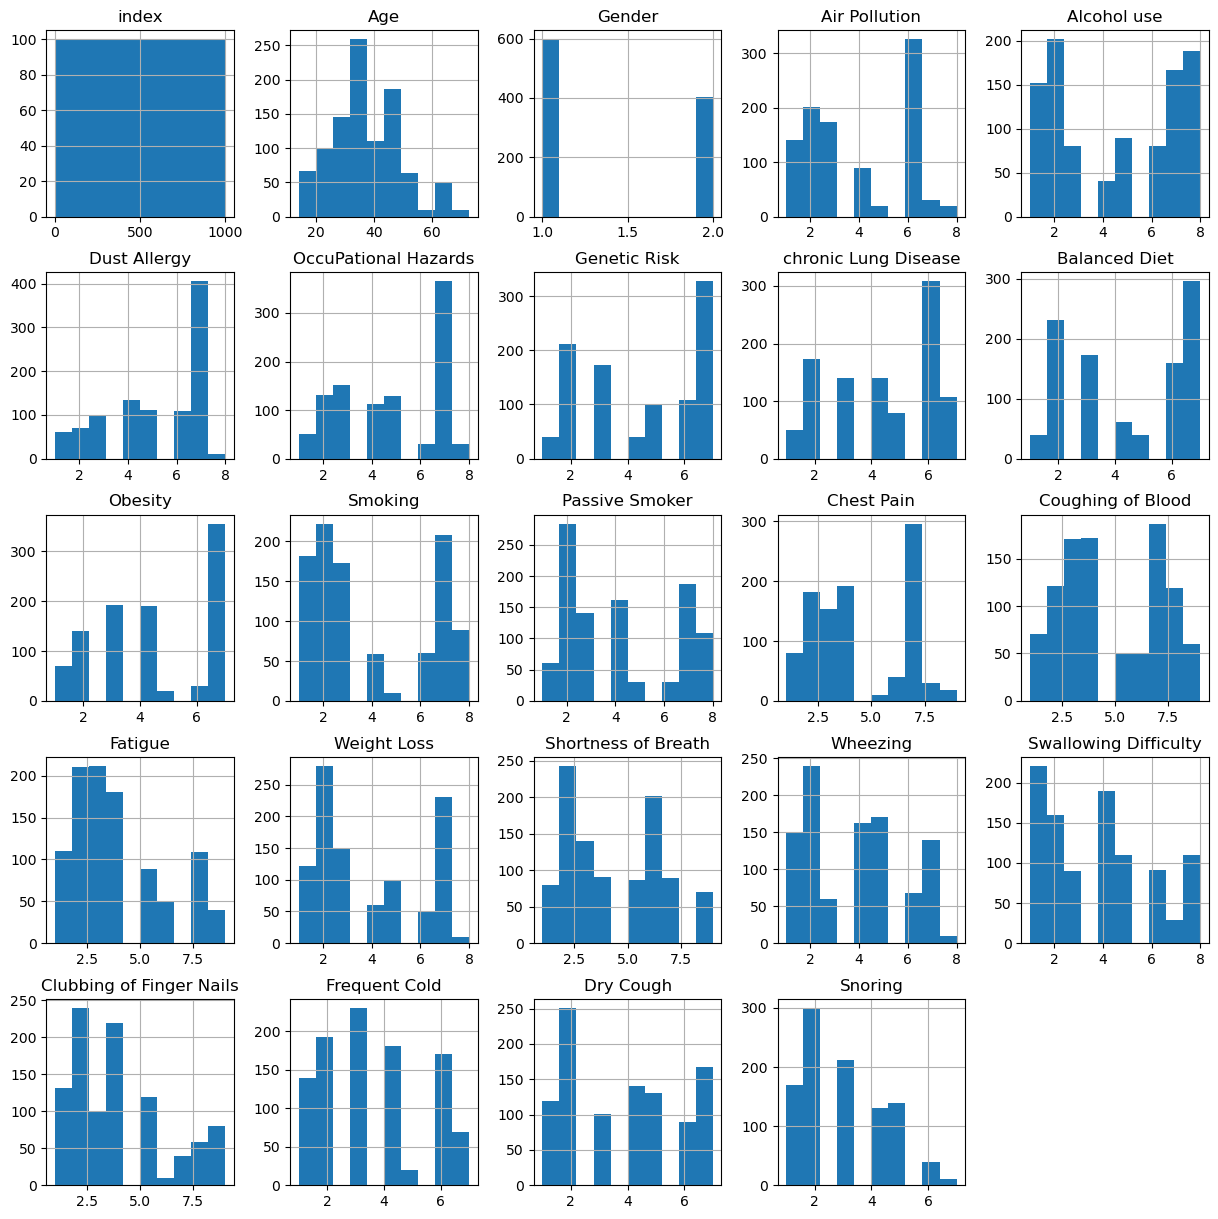

In [55]:
df.hist(figsize=(15,15))
plt.show()

In [42]:
df.Level = df.Level.astype('category')
y = df.Level.cat.codes.values
y

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [43]:
X = df.drop(["Level","index","Patient Id"], axis=1)

In [44]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression 

selector = SelectKBest(f_regression, k = "all")
selector.fit(X_train, y_train)

f_values = pd.Series(selector.scores_, index = X_train.columns)
f_values = f_values.sort_values(ascending=False)
f_values

Passive Smoker              565.194375
Coughing of Blood           522.227329
Balanced Diet               494.776013
Smoking                     458.646104
Obesity                     372.984824
Air Pollution               368.357816
Chest Pain                  248.640212
chronic Lung Disease        169.601656
Genetic Risk                166.111356
Alcohol use                 163.299386
Fatigue                     162.053982
OccuPational Hazards        106.397126
Dust Allergy                 55.651845
Dry Cough                    46.579259
Frequent Cold                22.836896
Shortness of Breath          17.848492
Clubbing of Finger Nails     17.826299
Wheezing                     17.446046
Gender                        3.480251
Age                           2.121282
Swallowing Difficulty         1.544926
Weight Loss                   1.032244
Snoring                       1.009010
dtype: float64

In [31]:
mdl=LogisticRegression()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',LogisticRegression())])

search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-3, 3, 100),
                 'Classifier__penalty':['l1','l2']}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=11.497569953977356, solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=11.497569953977356, solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 11.497569953977356,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l2',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [33]:
mdl=LogisticRegression(solver="liblinear",max_iter=1000,C=11.497569953977356,penalty="l2")
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 1.0


In [36]:
ypred

array([1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1,
       0, 2], dtype=int8)

In [67]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    import numpy as np
    

    CM = confusion_matrix(y_test, y_pred_test)
    pl.figure(figsize=(9,6))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=pl.cm.Blues, linewidths=5)

   
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title('Confusion Matrix for Random Forest Model')
    pl.show()

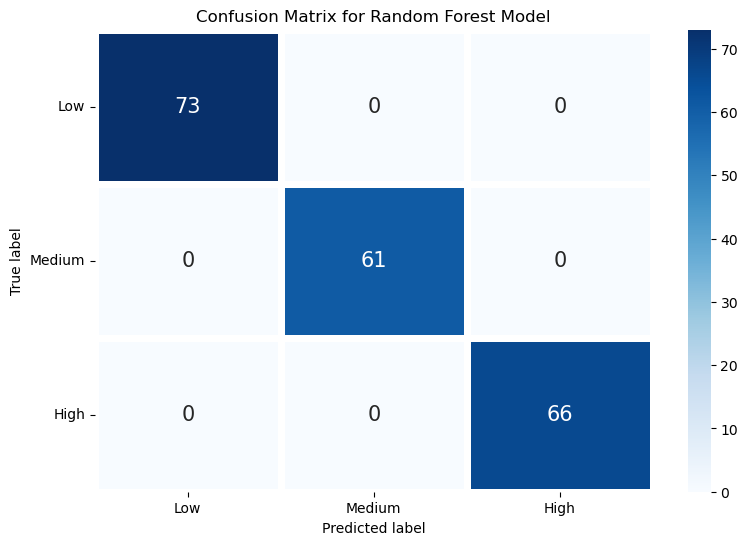

In [68]:
CM(y_test, ypred, col_names=['Low', 'Medium', 'High'])

In [69]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

